In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# for data load
import os

# for reading and processing images
import imageio
from PIL import Image
import tifffile
import cv2

# for visualizations
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np # for using np arrays
from numpy import asarray

# for bulding and running deep learning model
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout 
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import concatenate
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

### Load data


In [3]:
# Thay bằng đường dẫn đến mask và image
# Nhớ là phải lọc ảnh trước, vì có những ảnh không có mask (đã viết file helper trong project để xử lý vấn đề này)

images_folder = '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images'
masks_folder = '/content/gdrive/MyDrive/nt-dataset/cus/256x256/masks'

In [52]:
list_image_name = os.listdir(images_folder)
list_masks_name = os.listdir(masks_folder) 

print(list_image_name)
print(len(list_image_name))

print(list_masks_name)
print(len(list_masks_name))

['nt-25.jpg', 'nt-15.jpg', 'nt-21.jpg', 'nt-24.jpg', 'nt-0.jpg', 'nt-4.jpg', 'nt-39.jpg', 'nt-26.jpg', 'nt-3.jpg', 'nt-19.jpg', 'nt-32.jpg', 'nt-22.jpg', 'nt-35.jpg', 'nt-33.jpg', 'nt-1.jpg', 'nt-2.jpg', 'nt-13.jpg', 'nt-10.jpg', 'nt-14.jpg', 'nt-12.jpg', 'nt-6.jpg', 'nt-11.jpg', 'nt-28.jpg', 'nt-31.jpg', 'nt-18.jpg', 'nt-9.jpg', 'nt-7.jpg', 'nt-17.jpg', 'nt-23.jpg', 'nt-36.jpg', 'nt-30.jpg', 'nt-8.jpg', 'nt-20.jpg', 'nt-27.jpg', 'nt-37.jpg', 'nt-34.jpg', 'nt-16.jpg', 'nt-5.jpg', 'nt-38.jpg', 'nt-29.jpg', 'nt-73.jpg', 'nt-69.jpg', 'nt-76.jpg', 'nt-50.jpg', 'nt-45.jpg', 'nt-63.jpg', 'nt-72.jpg', 'nt-74.jpg', 'nt-64.jpg', 'nt-48.jpg', 'nt-59.jpg', 'nt-40.jpg', 'nt-42.jpg', 'nt-65.jpg', 'nt-41.jpg', 'nt-56.jpg', 'nt-55.jpg', 'nt-75.jpg', 'nt-71.jpg', 'nt-43.jpg', 'nt-47.jpg', 'nt-44.jpg', 'nt-49.jpg', 'nt-67.jpg', 'nt-54.jpg', 'nt-77.jpg', 'nt-70.jpg', 'nt-58.jpg', 'nt-53.jpg', 'nt-66.jpg', 'nt-51.jpg', 'nt-60.jpg', 'nt-57.jpg', 'nt-52.jpg', 'nt-68.jpg', 'nt-46.jpg', 'nt-61.jpg', 'nt-88.j

In [53]:
def load_path(imgs_dir, masks_dir):
  images = []
  masks = []

  for file in os.listdir(images_folder):
    images.append(os.path.join(images_folder, file))

  for file in os.listdir(masks_folder):
    masks.append(os.path.join(masks_folder, file))

  return images, masks

In [54]:
list_images_paths, list_masks_paths = load_path(images_folder, masks_folder)

In [55]:
list_images_paths.sort()
print(list_images_paths)
print(len(list_images_paths))

list_masks_paths.sort()
print(list_masks_paths)
print(len(list_masks_paths))

['/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-0.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-1.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-10.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-100.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-101.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-102.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-103.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-104.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-105.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-106.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-107.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-108.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-109.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-11.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/image

In [56]:
def show_img_with_mask(idx, images, masks):
    img = plt.imread(images[idx])
    mask = plt.imread(masks[idx])
    pair = np.concatenate((img, mask), axis=1)
    plt.figure(figsize=(15,20))
    plt.imshow(pair, cmap='gray')

In [57]:
train_image_paths, test_image_paths = train_test_split(list_images_paths, test_size=0.2, random_state=42)

print(train_image_paths)
print(len(train_image_paths))

print(test_image_paths)
print(len(test_image_paths))

['/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-5.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-87.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-59.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-184.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-9.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-174.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-26.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-186.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-231.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-50.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-17.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-238.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-211.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-206.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/n

In [58]:
def get_masks_corres(images_list):
  masks_list = []
  for i in range(0, len(images_list)):
    temp_list = images_list[i].split('/')
    temp_list[-2] = 'masks'
    masks_list.append('/'.join(temp_list))
  return masks_list

In [59]:
train_mask_paths = get_masks_corres(train_image_paths)
test_mask_paths = get_masks_corres(test_image_paths)

print(train_image_paths)
print(train_mask_paths)
print(len(train_mask_paths))

print(test_image_paths)
print(test_mask_paths)
print(len(test_mask_paths))

['/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-5.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-87.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-59.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-184.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-9.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-174.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-26.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-186.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-231.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-50.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-17.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-238.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-211.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/nt-206.jpg', '/content/gdrive/MyDrive/nt-dataset/cus/256x256/images/n

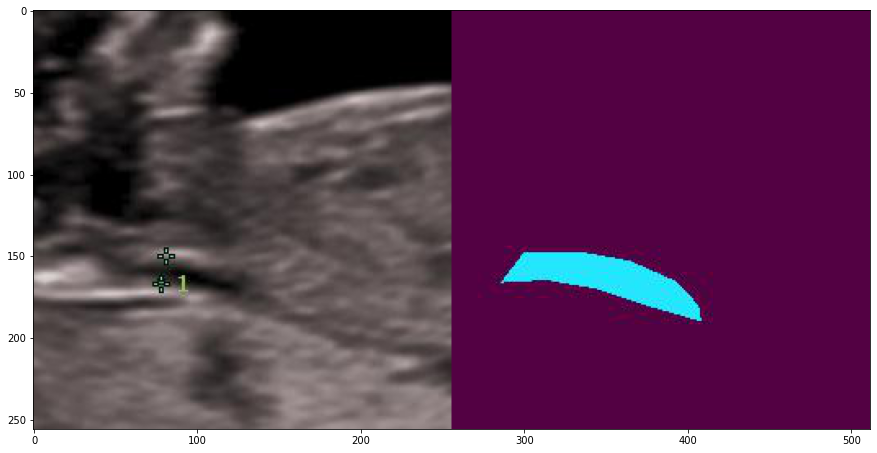

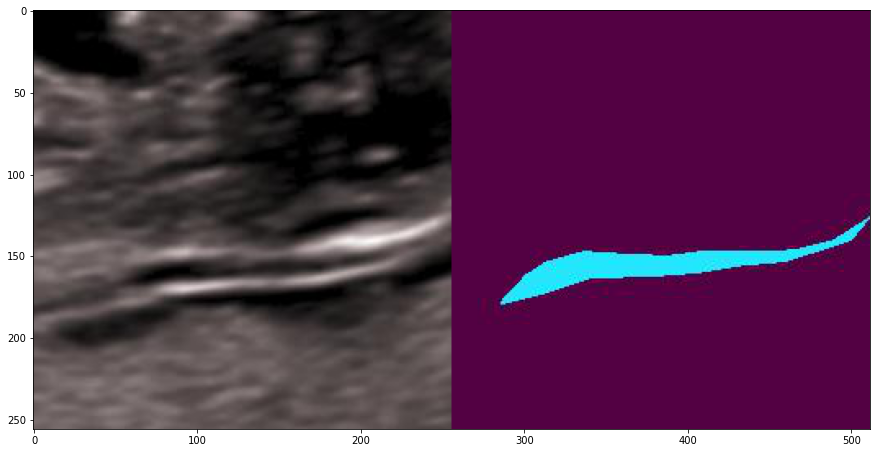

In [60]:
for i in range(2):
    show_img_with_mask(i, train_image_paths, train_mask_paths)

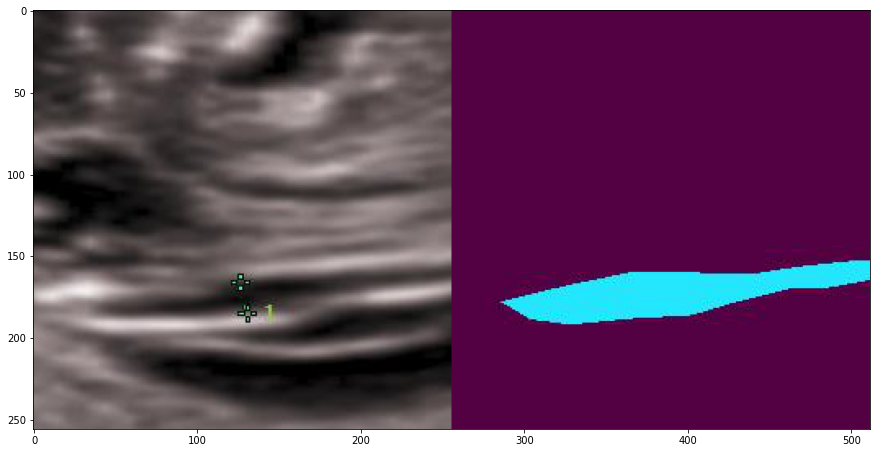

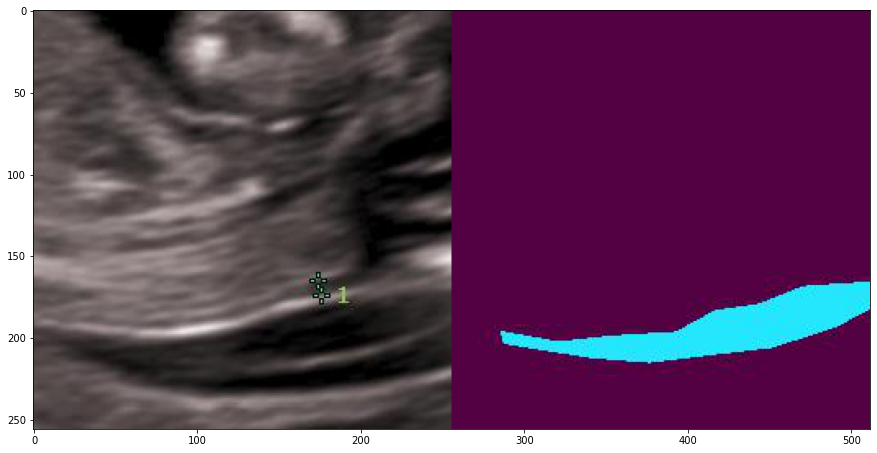

In [61]:
for i in range(2):
    show_img_with_mask(i, test_image_paths, test_mask_paths)

### Preprocessing data

In [62]:
target_shape_img = [256, 256, 3]
target_shape_mask = [256, 256, 1]

In [70]:

def PreprocessData(image_list, mask_list, mode="train"):
    """
    Processes the images and mask present in the shared list and path
    Returns a NumPy dataset with images as 3-D arrays of desired size
    Please note the masks in this dataset have only one channel
    """

    # Pull the relevant dimensions for image and mask
    number_of_example = len(image_list)                  # number of images
    image_height, image_width, image_channels = target_shape_img   # pull height, width, and channels of image
    mask_height, mask_width, mask_channels = target_shape_mask  # pull height, width, and channels of mask

    # Define X and Y as number of images along with shape of one image
    images = np.zeros((number_of_example, image_height, image_width, image_channels), dtype=np.float32)
    masks = np.zeros((number_of_example, mask_height, mask_width, mask_channels), dtype=np.int32)

    print('----------- Processing {0} images --------------'.format(mode))
    # Resize images and masks
    for (index, img) in enumerate(image_list):
        # convert image into an array of desired shape (3 channels)
        single_img = Image.open(img).convert('RGB')
        # single_img = single_img.resize((image_height, image_width))
        single_img = np.reshape(single_img, (image_height, image_width, image_channels))
        single_img = single_img/256.
        images[index] = single_img
    print('----------- Processing {0} images done! --------------'.format(mode))
    print('\n')
    print('----------- Processing {0} mask --------------'.format(mode))
    for (index, mask) in enumerate(mask_list):
        # convert mask into an array of desired shape (1 channel)
        single_mask = cv2.imread(mask, cv2.IMREAD_GRAYSCALE)
        # single_mask = cv2.resize(single_mask, dsize=(mask_height, mask_width), interpolation=cv2.INTER_NEAREST)
        # single_mask = asarray(single_mask)
        # single_mask = single_mask[..., tf.newaxis]
        single_mask = np.reshape(single_mask, (mask_height, mask_width, mask_channels))
        # single_mask = single_mask/255
        single_mask = single_mask.astype(int)
        masks[index] = single_mask
    print('----------- Processing {0} mask done! --------------'.format(mode))
    print('\n \n')
    # result
    return images, masks

In [ ]:
# Process data using apt helper function
img_train, mask_train = PreprocessData(train_image_paths, train_mask_paths)
img_test, mask_test = PreprocessData(test_image_paths, test_mask_paths, "test")

# train
print("Train img Shape:", img_train.shape)
print("Train mask shape:", mask_train.shape)

# test
print("Test img Shape:", img_test.shape)
print("Mask img shape:", mask_test.shape)

# There are 2 classes
print(np.unique(img_train))

Text(0.5, 1.0, 'Processed Masked Image ')

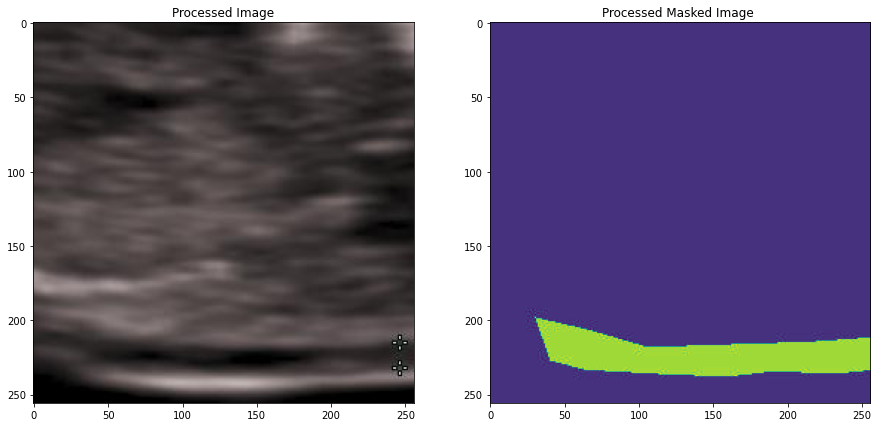

In [73]:
# Visualize the output
index_test = 9
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(img_train[index_test])
arr[0].set_title('Processed Image')
arr[1].imshow(mask_train[index_test, :, :, 0])
arr[1].set_title('Processed Masked Image ')

Text(0.5, 1.0, 'Processed Masked Image ')

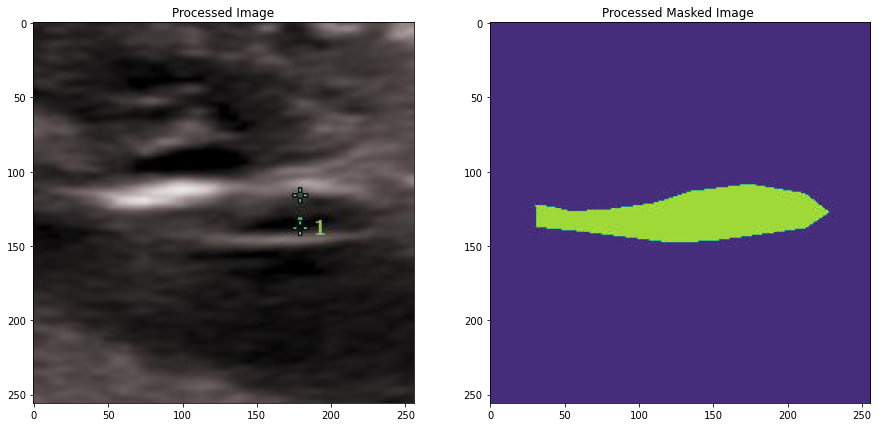

In [74]:
# Visualize the output
index_test = 29
fig, arr = plt.subplots(1, 2, figsize=(15, 15))
arr[0].imshow(img_test[index_test])
arr[0].set_title('Processed Image')
arr[1].imshow(mask_test[index_test][:, :, 0])
arr[1].set_title('Processed Masked Image ')

In [75]:
input_size = (256, 256, 3)
n_filters = 64
n_classes = 2

In [76]:
def EncoderMiniBlock(inputs, n_filters=n_filters, dropout_prob=0.3, max_pooling=True):
    # Add 2 Conv Layers with relu activation and HeNormal initialization using TensorFlow
    # Proper initialization prevents from the problem of exploding and vanishing gradients
    # 'Same' padding will pad the input to conv layer such that the output has the same height and width (hence, is not reduced in size)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(inputs)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(conv)

    # Batch Normalization will normalize the output of the last layer based on the batch's mean and standard deviation
    conv = BatchNormalization()(conv, training=False)

    # In case of overfitting, dropout will regularize the loss and gradient computation to shrink the influence of weights on output
    if dropout_prob > 0:
        conv = tf.keras.layers.Dropout(dropout_prob)(conv)
    # Pooling reduces the size of the image while keeping the number of channels same
    # Pooling has been kept as optional as the last encoder layer does not use pooling (hence, makes the encoder block flexible to use)
    # Below, Max pooling considers the maximum of the input slice for output computation and uses stride of 2 to traverse across input image
    if max_pooling:
        next_layer = tf.keras.layers.MaxPooling2D(pool_size = (2,2))(conv)
    else:
        next_layer = conv

    # skip connection (without max pooling) will be input to the decoder layer to prevent information loss during transpose convolutions
    skip_connection = conv

    return next_layer, skip_connection

In [77]:
def DecoderMiniBlock(prev_layer_input, skip_layer_input, n_filters=n_filters):
    # Start with a transpose convolution layer to first increase the size of the image
    up = Conv2DTranspose(n_filters,(3, 3), strides=(2, 2), padding='same')(prev_layer_input)

    # Merge the skip connection from previous block to prevent information loss
    merge = concatenate([up, skip_layer_input], axis=3)

    # Add 2 Conv Layers with relu activation and HeNormal initialization for further processing
    # The parameters for the function are similar to encoder
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(merge)
    conv = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='HeNormal')(conv)
    return conv


In [78]:
def UNetCompiled(input_size=input_size, n_filters=n_filters, n_classes=n_classes):
    inputs = Input(input_size)

    # Encoder includes multiple convolutional mini blocks with different maxpooling, dropout and filter parameters
    # Observe that the filters are increasing as we go deeper into the network which will increasse the # channels of the image 
    cblock1 = EncoderMiniBlock(inputs, n_filters,dropout_prob=0, max_pooling=True)
    cblock2 = EncoderMiniBlock(cblock1[0], n_filters*2, dropout_prob=0, max_pooling=True)
    cblock3 = EncoderMiniBlock(cblock2[0], n_filters*4, dropout_prob=0, max_pooling=True)
    cblock4 = EncoderMiniBlock(cblock3[0], n_filters*8, dropout_prob=0.3, max_pooling=True)
    cblock5 = EncoderMiniBlock(cblock4[0], n_filters*16, dropout_prob=0.3, max_pooling=False)

    # Decoder includes multiple mini blocks with decreasing number of filters
    # Observe the skip connections from the encoder are given as input to the decoder
    # Recall the 2nd output of encoder block was skip connection, hence cblockn[1] is used
    ublock6 = DecoderMiniBlock(cblock5[0], cblock4[1],  n_filters*8)
    ublock7 = DecoderMiniBlock(ublock6, cblock3[1],  n_filters*4)
    ublock8 = DecoderMiniBlock(ublock7, cblock2[1],  n_filters*2)
    ublock9 = DecoderMiniBlock(ublock8, cblock1[1],  n_filters)

    # Complete the model with 1 3x3 convolution layer (Same as the prev Conv Layers)
    # Followed by a 1x1 Conv layer to get the image to the desired size. 
    # Observe the number of channels will be equal to number of output classes
    conv9 = Conv2D(n_filters, 3, activation='relu', padding='same', kernel_initializer='he_normal')(ublock9)
    conv10 = Conv2D(n_classes, 1, padding='same')(conv9)

    # Define the model
    model = tf.keras.Model(inputs=inputs, outputs=conv10)

    return model

In [79]:
# Use scikit-learn's function to split the dataset
# Here, I have used 20% data as test/valid set
X_train, X_valid, y_train, y_valid = img_train, img_test, mask_train, mask_test

# Call the helper function for defining the layers for the model, given the input image size
unet = UNetCompiled()

# Check the summary to better interpret how the output dimensions change in each layer
unet.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_60 (Conv2D)             (None, 256, 256, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 256, 256, 64  36928       ['conv2d_60[0][0]']              
                                )                                                           

In [ ]:
# There are multiple optimizers, loss functions and metrics that can be used to compile multi-class segmentation models
# Ideally, try different options to get the best accuracy
optimizer=Adam(learning_rate=1e-5)
batch_size = 32
epochs = 20

unet.compile(optimizer=optimizer, loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Run the model in a mini-batch fashion and compute the progress for each epoch
results = unet.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_valid, y_valid))

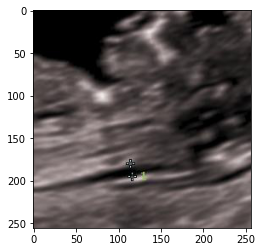

In [47]:
plt.imshow(img_test[34])

In [50]:
def unet_predict(index_of_test):
  img = img_test[index_of_test][np.newaxis, ...]
  pred_y = unet.predict(img)
  pred_mask = tf.argmax(pred_y[0], axis=-1)
  return pred_mask

In [ ]:
index_test = 12
pred_mask = unet_predict(index_test)

_, arr = plt.subplots(1, 3, figsize=(15, 15))
arr[0].imshow(img_test[index_test])
arr[0].set_title('Processed image')
arr[1].imshow(mask_test[index_test][:, :, 0])
arr[1].set_title('Processed masked image ')
arr[2].imshow(pred_mask)
arr[2].set_title('Processed predict mask ')